## Objetivo:
Realizar un modelado completo para un problema de clasificación y un problema de regresión, comparando diferentes técnicas y procedimientos explicados durante el desarrollo de la materia.
## Instrucciones Generales:
1.	Cada grupo deberá **elegir un dataset de clasificación y otro de regresión** (cada grupo deberá trabajar con datasets distintos). Se les sugiere usar datasets de fuentes como Kaggle, UCI Machine Learning Repository o cualquier otro repositorio que consideren relevante.
2.	El objetivo es comparar distintos modelos y técnicas vistas en la materia. Deberán aplicar técnicas de preprocesamiento, selección de características, y validar el rendimiento de los modelos elegidos utilizando las métricas adecuadas.
3.	El trabajo se debe entregar en formato Jupyter Notebook, o cualquier otro que consideren conveniente, e incluir todas las etapas de un análisis de minería de datos, desde la exploración inicial hasta la evaluación del rendimiento de los modelos.


## Secciones del Trabajo Práctico
**1. Descripción del Problema:**
* Describir el problema de clasificación y regresión seleccionados.
* Comenzar efectuando un resumen del dataset y de sus características (para entenderlo antes de comenzar a trabajar con él).
* Justificar por qué los datasets son adecuados para aplicar los modelos vistos en la materia.
* Detallar el objetivo del análisis para cada dataset (ej. ¿Qué se espera predecir?).

**2. Análisis Exploratorio de Datos (EDA):**
* Realizar una exploración inicial de los datasets.
    * Estadísticas descriptivas: revisar los datos, dimensiones de los datos, tipos de datos, resumen (media, desviación estándar, mediana, etc.)
    * Distribución entre clases.    
    * Asimetría.
    * Visualización de distribuciones de variables (Histograma, Gráfico de Densidad o KDE).
    * Obtención de Matriz y Visualización de correlaciones entre variables.
    * Visualización de la matriz de dispersión (regresión) y matriz de dipersión por clase (clasificación).
    * Boxplots (regresión) y Boxplots por clase (clasificación).
* Identificar valores atípicos y valores faltantes. 
* Manejo de valores faltantes, limpiar los datos, eliminación de duplicados, corrección de inconsistencias de formato (si los hubiera), según sea necesario explicando el proceso.

**3. Preprocesamiento de Datos:**
* Dividir el dataset en entrenamiento y prueba (train/test split).
* Aplicar a lo sumo 1 técnica de transformación de datos (pueden ser de las vistas en clase u otras que consideren convenientes, pueden ser 2 o más también):
  * Escalamiento, estandarización o normalización.
  * Binarización.
  * Box-Cox o Yeo-Johnson.
  * Codificación de variables categóricas (para los atributos que lo requieran tanto en clasificación como en regresión, y para el atributo clase para problemas de clasificación, en caso de ser necesario). --> Usar Label Encoding, One-Hot Encoding o Target Encoding.
  * **En caso de aplicar 2 o más transformaciones al conjunto de datos es importante el orden en el que se aplican. ej: 1ro Box-Cox / 2do estandarización.**
* **Es importante que las transformaciones se ajusten solo con los datos de entrenamiento y luego se apliquen al conjunto de prueba.**
* Visualizar (el DF y también gráficamente) el antes y después de cada transformación aplicada.

#### --> Los siguientes puntos se agregarán en clases siguientes...

**Conclusiones:**
* Comparar los modelos y sacar conclusiones sobre cuál fue el más adecuado para cada tarea. 
* Expresar las limitaciones del análisis y posibles mejoras.
## Grupos:
* Serán 5 grupos de 4 integrantes y 1 grupo de 5 integrantes (la clase del 28 de Mayo deben presentar por grupos los datasets con los que trabajarán).
* Entrega del trabajo realizado: A determinar.

## Criterios de Evaluación: 

* Claridad en la explicación de los pasos y las técnicas aplicadas.
* Justificación de la elección de los modelos y técnicas.
* Precisión en los resultados obtenidos (métricas de evaluación).
* Calidad de las visualizaciones y del análisis de los resultados.
* Rigor en la comparación de los modelos.
* Creatividad en las conclusiones y en la presentación final.


El dataset de clasificación es el de entrenamiento (train.csv) de la competición de Kaggle (https://www.kaggle.com/competitions/titanic) en la que se propone predecir la columna Survived (que determina si un pasajero del Titanic sobrevivió o no al accidente de este transatlántico) basándose en un set de prueba (test.csv) de la competición para subir las predicciones a Kaggle y ver el accuracy del modelo entrenado en este set de prueba.  

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

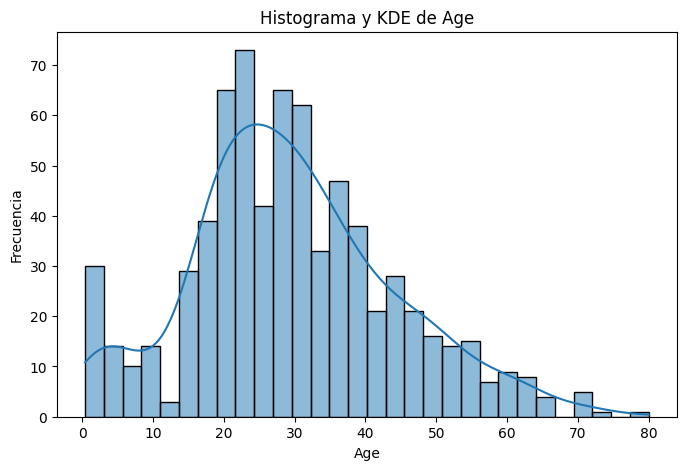

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Histograma y KDE de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

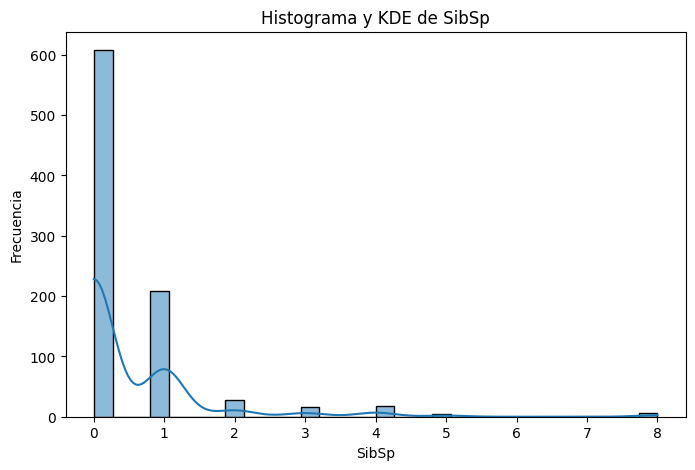

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['SibSp'].dropna(), kde=True, bins=30)
plt.title('Histograma y KDE de SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frecuencia')
plt.show()

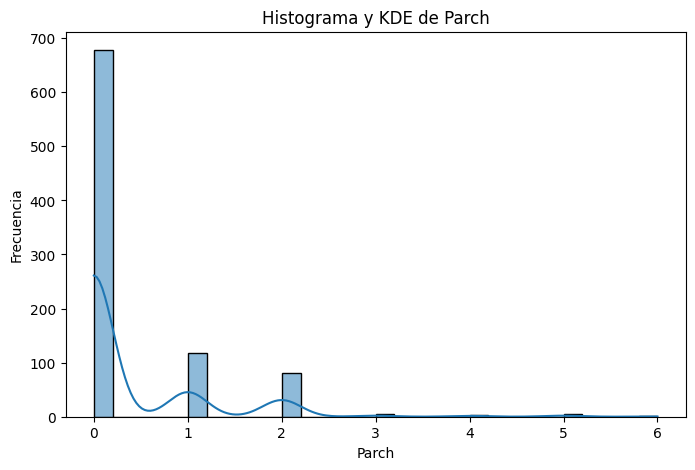

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Parch'].dropna(), kde=True, bins=30)
plt.title('Histograma y KDE de Parch')
plt.xlabel('Parch')
plt.ylabel('Frecuencia')
plt.show()

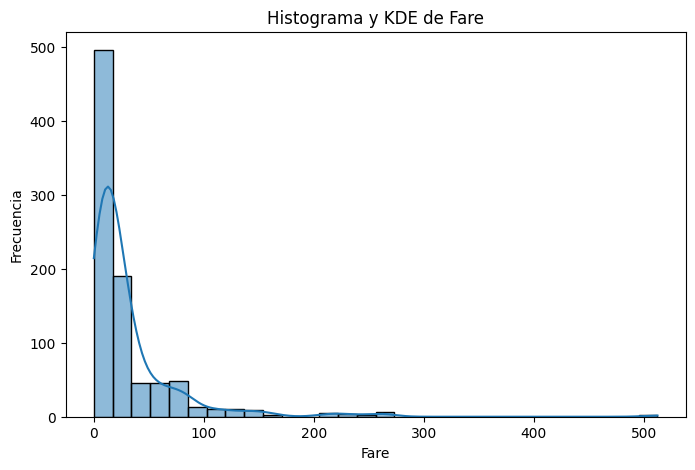

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title('Histograma y KDE de Fare')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.show()

Text(0.5, 1.0, 'Matriz de Correlación')

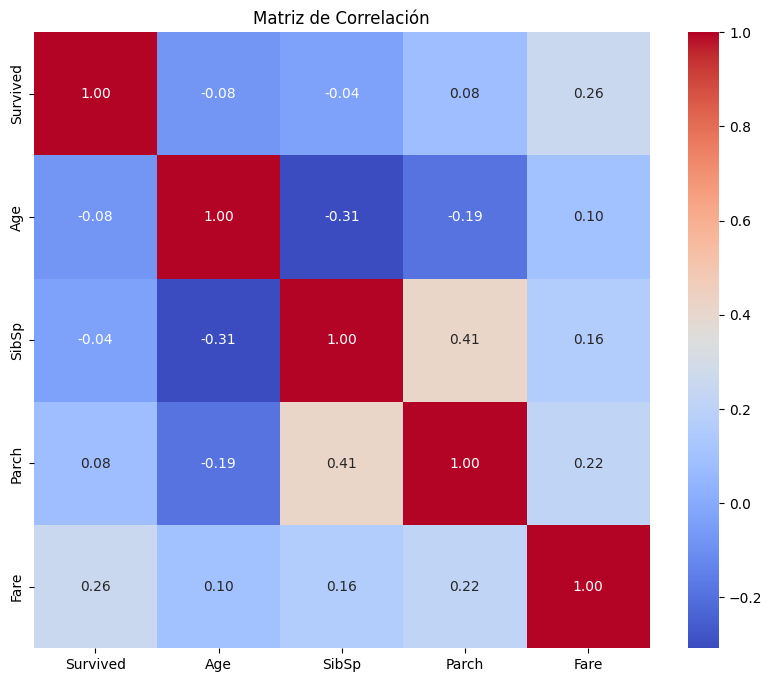

In [12]:
matriz_de_correlacion = df[['Survived','Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')


In [ ]:
def crosstabs(df, col1, col2):

    crosstab = pd.crosstab(df[col1], df[col2])

    crosstab_index = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    crosstab_index = crosstab_index.round(2)

    crosstab_all = pd.crosstab(df[col1], df[col2], normalize='all') * 100
    crosstab_all = crosstab_all.round(2)

    crosstab_columns = pd.crosstab(df[col1], df[col2], normalize='columns') * 100
    crosstab_columns = crosstab_columns.round(2)

    # El siguiente código es para ver las tablas una al lado de la otra y poder verlas todas a la vez (en VSC).

    html = f"""
    <div style="display: flex; gap: 30px;">
        <div> 
            <b>Crosstab sin normalizar: </b>
            {crosstab.to_html()}
        <div>
            <b>Crosstab por índice:</b>
            {crosstab_index.to_html()}
        </div>
        <div>
            <b>Crosstab por total:</b>
            {crosstab_all.to_html()}
        </div>
        <div>
            <b>Crosstab por columnas:</b>
            {crosstab_columns.to_html()}
        </div>
    </div>
    """
    display(HTML(html))

In [36]:
crosstabs(df, 'Survived', 'Pclass')

Pclass,1,2,3
Survived,,,
0,14.57,17.67,67.76
1,39.77,25.44,34.80
Pclass,1,2,3
Survived,,,
0,8.98,10.89,41.75
1,15.26,9.76,13.36
Pclass,1,2,3
Survived,,,
0,37.04,52.72,75.76


Notamos que de los pasajeros que murieron el 67,76% eran de clase baja, el 
41,75% de los pasajeros del dataset eran de clase baja y murieron, y que el 
75,76% de los pasajeros de clase baja no sobrevivieron, esto nos hace pensar que hay una relación entre la variable Survived y la variable Pclass.

In [15]:
crosstabs(df, 'Survived', 'Sex')

Crosstab por índice:
Sex       female   male
Survived               
0          14.75  85.25
1          68.13  31.87

Crosstab por total:
Sex       female   male
Survived               
0           9.09  52.53
1          26.15  12.23

Crosstab por columnas:
Sex       female   male
Survived               
0           25.8  81.11
1           74.2  18.89


Notamos que el 85,25% de los no sobrevivientes fueron hombres, el 52,53% de los pasajeros del Titanic fueron hombres que no sobrevivieron y el 74,2% de las mujeres pasajeras del titanic sobrevivieron y el 81,11% de los pasajeros hombres no sobrevivieron, lo que claramente indica una relación entre la variable Sex y la variable Survived.

In [16]:
crosstabs(df, 'SibSp', 'Survived')

Crosstab por índice:
Survived       0      1
SibSp                  
0          65.46  34.54
1          46.41  53.59
2          53.57  46.43
3          75.00  25.00
4          83.33  16.67
5         100.00   0.00
8         100.00   0.00

Crosstab por total:
Survived      0      1
SibSp                 
0         44.67  23.57
1         10.89  12.57
2          1.68   1.46
3          1.35   0.45
4          1.68   0.34
5          0.56   0.00
8          0.79   0.00

Crosstab por columnas:
Survived      0      1
SibSp                 
0         72.50  61.40
1         17.67  32.75
2          2.73   3.80
3          2.19   1.17
4          2.73   0.88
5          0.91   0.00
8          1.28   0.00


In [17]:
crosstabs(df, 'Survived', 'Parch')

Crosstab por índice:
Parch         0      1      2     3     4     5     6
Survived                                             
0         81.06   9.65   7.29  0.36  0.73  0.73  0.18
1         68.13  19.01  11.70  0.88  0.00  0.29  0.00

Crosstab por total:
Parch         0     1     2     3     4     5     6
Survived                                           
0         49.94  5.95  4.49  0.22  0.45  0.45  0.11
1         26.15  7.30  4.49  0.34  0.00  0.11  0.00

Crosstab por columnas:
Parch         0      1     2     3      4     5      6
Survived                                              
0         65.63  44.92  50.0  40.0  100.0  80.0  100.0
1         34.37  55.08  50.0  60.0    0.0  20.0    0.0


In [18]:
crosstabs(df, 'Survived', 'Embarked')

Crosstab por índice:
Embarked      C     Q      S
Survived                    
0         13.66  8.56  77.78
1         27.35  8.82  63.82

Crosstab por total:
Embarked      C     Q      S
Survived                    
0          8.44  5.29  48.03
1         10.46  3.37  24.41

Crosstab por columnas:
Embarked      C      Q     S
Survived                    
0         44.64  61.04  66.3
1         55.36  38.96  33.7


Vemos que el 66% de los pasajeros que se embarcaron en el puerto de Southampton no sobrevivieron.

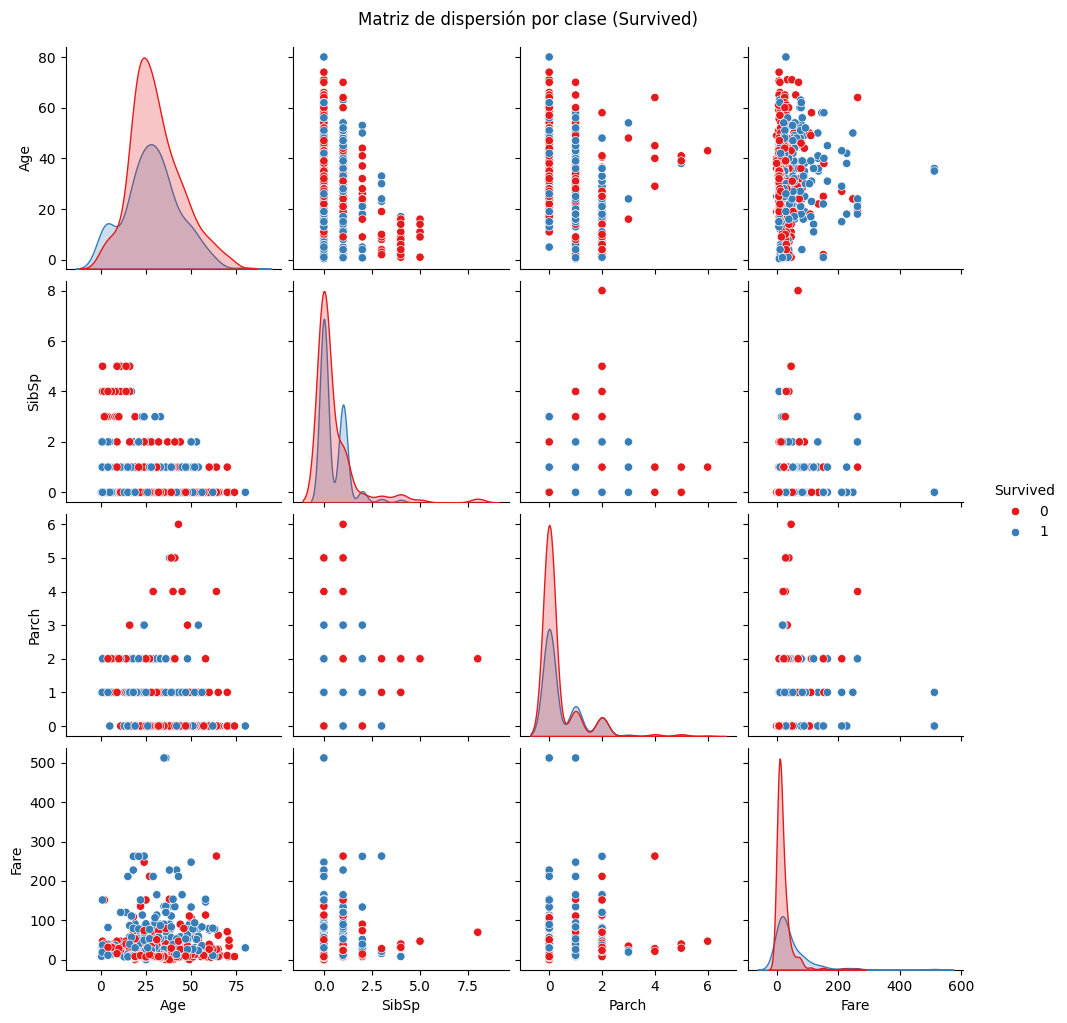

In [19]:
variables = ['Age', 'SibSp', 'Parch', 'Fare']

sns.pairplot(df[variables + ['Survived']], hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Matriz de dispersión por clase (Survived)', y=1.02)
plt.show()

Text(0.5, 0.98, '')

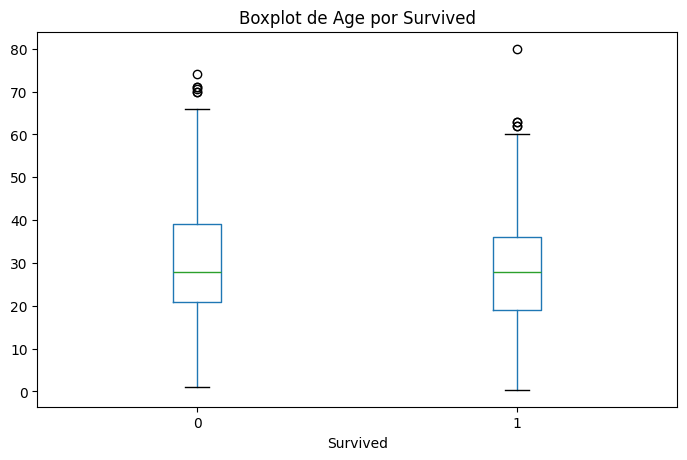

In [20]:
df.boxplot(column='Age', by='Survived', grid=False, figsize=(8, 5))
plt.title('Boxplot de Age por Survived')
plt.suptitle('')

Text(0.5, 0.98, '')

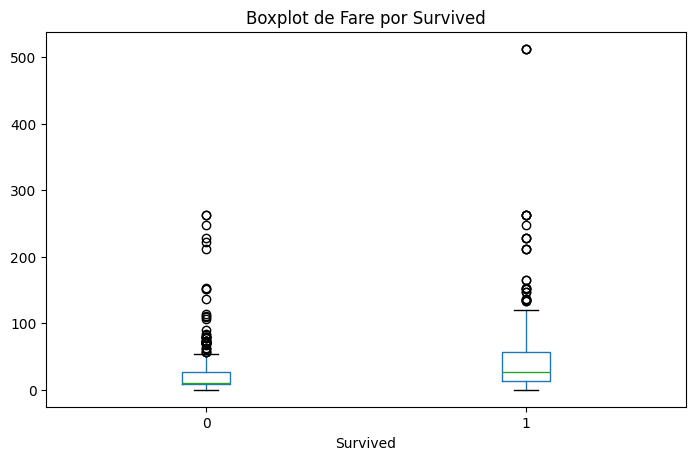

In [21]:
df.boxplot(column='Fare', by='Survived', grid=False, figsize=(8, 5))
plt.title('Boxplot de Fare por Survived')
plt.suptitle('')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vamos a cambiar los valores nulos de la columna Age por el promedio de los datos de esa columna que sí tenemos.

In [23]:
df['Age'].fillna(df['Age'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
type(df['Cabin'][1])

str

In [28]:
df['Cabin'].nunique()

147

Veamos si las letras al inicio del nombre de las cabinas tiene alguna relación con Survived

In [33]:
df_cabin = df.dropna(subset=['Cabin']).copy()
df_cabin['Cabin_initial'] = df_cabin['Cabin'].str[0]
crosstabs(df_cabin, 'Cabin_initial', 'Survived')

Crosstab por índice:
Survived            0      1
Cabin_initial               
A               53.33  46.67
B               25.53  74.47
C               40.68  59.32
D               24.24  75.76
E               25.00  75.00
F               38.46  61.54
G               50.00  50.00
T              100.00   0.00

Crosstab por total:
Survived           0      1
Cabin_initial              
A               3.92   3.43
B               5.88  17.16
C              11.76  17.16
D               3.92  12.25
E               3.92  11.76
F               2.45   3.92
G               0.98   0.98
T               0.49   0.00

Crosstab por columnas:
Survived           0      1
Cabin_initial              
A              11.76   5.15
B              17.65  25.74
C              35.29  25.74
D              11.76  18.38
E              11.76  17.65
F               7.35   5.88
G               2.94   1.47
T               1.47   0.00
